In [20]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from typing import TypedDict, Literal
from math import sqrt

In [21]:
load_dotenv()

True

In [22]:
class QuadEqState(TypedDict):
    a: float
    b: float
    c: float

    equation: str
    discriminant: float
    result: str

In [23]:
def show_equation(state: QuadEqState) -> QuadEqState:
    
    equation = f"{state['a']} x2 {state['b']} x {state['c']}"

    return {'equation': equation}

def calculate_discriminant(state: QuadEqState) -> QuadEqState:

    a = state['a']
    b = state['b']
    c = state['c']

    d = b**2 - (4*a*c)

    return {'discriminant': d}

In [24]:
def real_roots(state: QuadEqState) -> QuadEqState:

    a = state['a']
    b = state['b']
    c = state['c']
    
    d = state['discriminant']

    root1 = (b*-1 + sqrt(d)) / (2*a) # you can use d**0.5 as well to get square root
    root2 = (b*-1 - sqrt(d)) / (2*a)

    return {'result': f"Roots - ({root1}, {root2})"}

def equal_roots(state: QuadEqState) -> QuadEqState:

    a = state['a']
    b = state['b']
    c = state['c']

    root = (b*-1) / (2*a)

    return {'result': f"Roots - ({root}, {root})"}

def no_real_roots(state: QuadEqState) -> QuadEqState:

    return {'result': f"Roots - No possible real roots"}

In [25]:
def check_condition(state: QuadEqState) -> Literal['real_roots','equal_roots','no_real_roots']:
    d = state['discriminant']

    if d > 0:
        return 'real_roots'
    elif d == 0:
        return 'equal_roots'
    else:
        return 'no_real_roots'

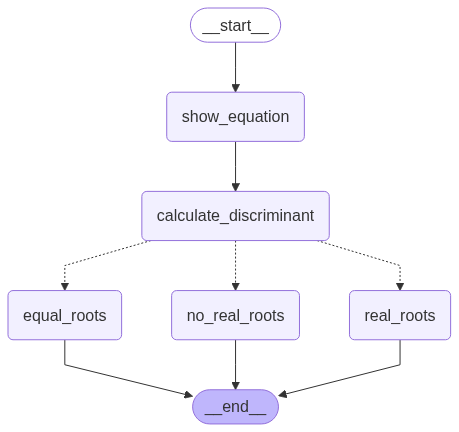

In [26]:
# Define graph
graph = StateGraph(QuadEqState)

# Add nodes
graph.add_node('show_equation', show_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)

graph.add_node('real_roots', real_roots)
graph.add_node('equal_roots', equal_roots)
graph.add_node('no_real_roots', no_real_roots)

# Add edges
graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')

graph.add_conditional_edges('calculate_discriminant', check_condition)
graph.add_edge('real_roots', END)
graph.add_edge('equal_roots', END)
graph.add_edge('no_real_roots', END)

# Compile workflow
workflow = graph.compile()
workflow

In [28]:
# Define initial state
initial_state = {
    'a': 2,
    'b': 8,
    'c': 5
}

workflow.invoke(initial_state)

{'a': 2,
 'b': 8,
 'c': 5,
 'equation': '2 x2 8 x 5',
 'discriminant': 24,
 'result': 'Roots - (-0.7752551286084111, -3.224744871391589)'}